In [5]:
import os
import seawater as sw
import numpy as np
import cmocean
import oceans
import netCDF4
import matplotlib.pyplot as plt
from scipy import interpolate
plt.rcParams.update({'font.size': 14})

In [6]:
datadir = "/data/Argo/"

In [7]:
datafile1 = os.path.join(datadir, "nodc_4900825_prof.nc")

In [8]:
with netCDF4.Dataset(datafile1, "r") as nc:
    T = nc.variables["temp"][:]
    S = nc.variables["psal"][:]
    p = nc.variables["pres"][:]
    lon = nc.get_variables_by_attributes(standard_name="longitude")[0][:]
    lat = nc.get_variables_by_attributes(standard_name="latitude")[0][:]
    timevar = nc.get_variables_by_attributes(standard_name="time")[0]
    timevalues = timevar[:]
    timeunits = timevar.units
    dates = netCDF4.num2date(timevalues, timeunits)

In [9]:
# Create arrays from the vector
datesmatrix = np.tile(dates, (75, 1)).transpose()
latmatrix = np.tile(lat, (75, 1)).transpose()
timematrix = np.tile(timevalues, (75, 1)).transpose()

In [10]:
# Convert pressure to depth
depth = sw.dpth(p, latmatrix)

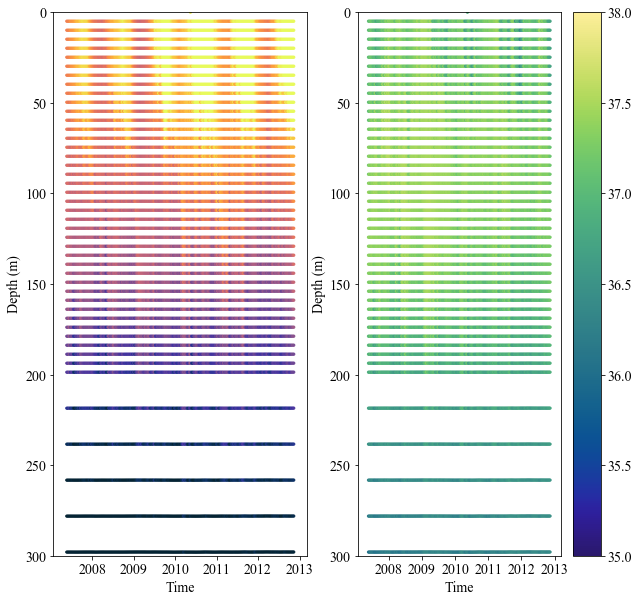

In [13]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.scatter(datesmatrix, depth.data, s=5, c=T, cmap=cmocean.cm.thermal, vmin=17., vmax=27.)
plt.ylim(0., 300.0)
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Depth (m)")

plt.subplot(122)
plt.scatter(datesmatrix, depth.data, s=5, c=S, cmap=cmocean.cm.haline, vmin=35., vmax=38.)
plt.ylim(0., 300.0)
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Depth (m)")
plt.colorbar()
plt.show()
plt.close()

In [16]:
# Perform interpolations on T and S
pointsinterp = np.stack((timematrix.flatten(), depth.flatten()), axis=-1)
timegrid = np.arange(np.floor(timevalues.min()), np.ceil(timevalues.max()), 10.)
depthgrid = np.arange(5, 300., 1.)
grid_x, grid_y = np.meshgrid(timegrid, depthgrid)
T_gridded = interpolate.griddata(pointsinterp, T.flatten(), (grid_x, grid_y), method='linear')
S_gridded = interpolate.griddata(pointsinterp, S.flatten(), (grid_x, grid_y), method='linear')

## Make plots
### Temperature

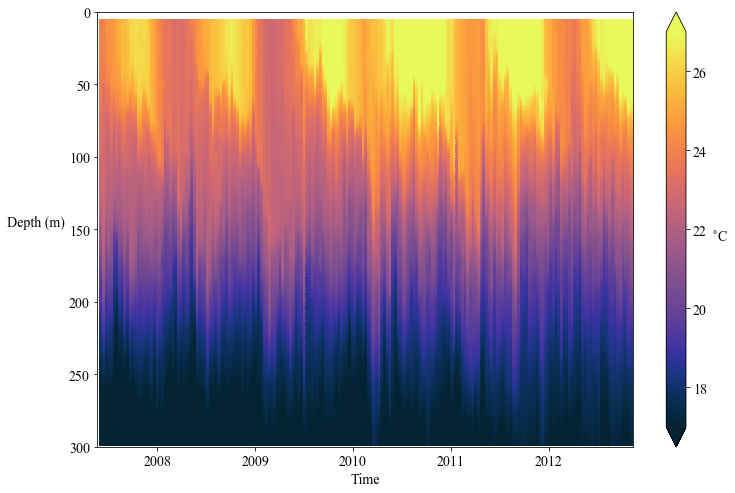

In [84]:
dategrid = netCDF4.num2date(timegrid, timeunits)
plt.figure(figsize=(12, 8))
plt.pcolormesh(dategrid, depthgrid, T_gridded, 
               vmin=17., vmax=27., cmap=cmocean.cm.thermal)
cb = plt.colorbar(extend='both')
cb.set_label("$^{\circ}$C", rotation=0, ha="left")
plt.ylim(0., 300.0)
plt.gca().invert_yaxis()
plt.xlabel("Time", fontsize=14)
plt.ylabel("Depth (m)", rotation=0, ha="right", fontsize=14)
plt.show()
plt.close()

### Salinity

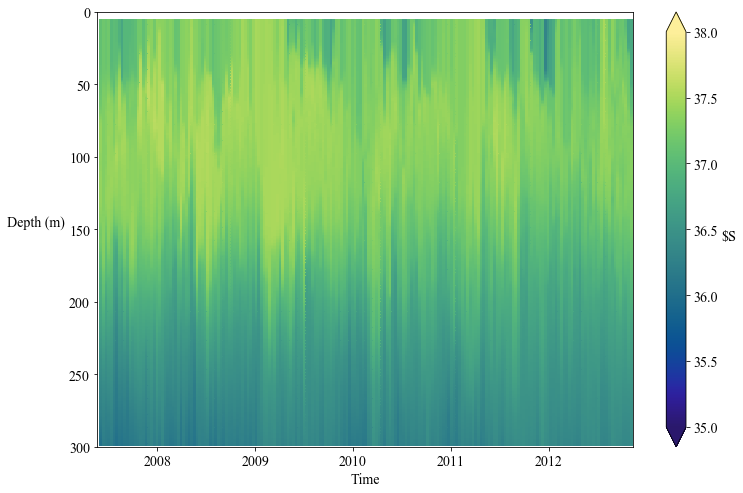

In [17]:
dategrid = netCDF4.num2date(timegrid, timeunits)
plt.figure(figsize=(12, 8))
plt.pcolormesh(dategrid, depthgrid, S_gridded, 
               vmin=35., vmax=38., cmap=cmocean.cm.haline)
cb = plt.colorbar(extend='both')
cb.set_label("$S", rotation=0, ha="left")
plt.ylim(0., 300.0)
plt.gca().invert_yaxis()
plt.xlabel("Time", fontsize=14)
plt.ylabel("Depth (m)", rotation=0, ha="right", fontsize=14)
plt.show()
plt.close()

In [ ]:
seaw